# Предсказание оттока клиентов

## Обзор данных
Импортируем необходимые библиотеки, загружаем данные в переменную.

In [ ]:
# импортируем библиотеки
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# прочитаем из csv-файла данные
df = pd.read_csv('C:\\Users\\algol\\Downloads\\WA_Churn.csv')

In [ ]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()

    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма,
#а также явных дубликатов
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    count_duplicates = df.duplicated().sum()

    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing,
                                     'num_duplicates': count_duplicates})

    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', df_data.shape[0])
    print('Количество столбцов файла:', df_data.shape[1])
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках и явных дубликатах данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

In [ ]:
df_info(df)

Количество строк файла: 7043
Количество столбцов файла: 21

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
SeniorCitizen,"[0, 1]",int64,2
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",int64,73
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",float64,1585
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",object,7043
PaymentMethod,"[Electronic check, Mailed check, Bank transfer...",object,4
PaperlessBilling,"[Yes, No]",object,2
Contract,"[Month-to-month, One year, Two year]",object,3
StreamingMovies,"[No, Yes, No internet service]",object,3
StreamingTV,"[No, Yes, No internet service]",object,3
TechSupport,"[No, Yes, No internet service]",object,3



Информация о пропусках и явных дубликатах данных:


,column_name,num_missing,percent_missing,num_duplicates
customerID,customerID,0,0.0,0
gender,gender,0,0.0,0
SeniorCitizen,SeniorCitizen,0,0.0,0
Partner,Partner,0,0.0,0
Dependents,Dependents,0,0.0,0
tenure,tenure,0,0.0,0
PhoneService,PhoneService,0,0.0,0
MultipleLines,MultipleLines,0,0.0,0
InternetService,InternetService,0,0.0,0
OnlineSecurity,OnlineSecurity,0,0.0,0



Первые пять строк таблицы:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Пропусков и явных дубликатов нет. Из 21 столбца 18 не числовые: бинарные или категориальные.

Таблица содержит следующие столбцы:
<div>'customerID' — Уникальный номер клиента;
<div>'SeniorCitizen' — Пожилой/не пожилой;
<div>'Partner' — Наличие партнера у клиента;
<div>'Dependents' — Наличие у клиента иждивенцев;
<div>'tenure' — Количество месяцев присутствия клиента;
<div>'PhoneService' — Есть ли у клиента телефонная служба.
<div>'MultipleLines' - Есть ли у клиента несколько линий или нет;
<div>'InternetService' — Вид интернета клиента;
<div>'OnlineSecurity' — Есть ли у клиента онлайн безопасность;
<div>'OnlineBackup' — есть ли у клиента онлайн-резервная копия или нет;
<div>'DeviceProtection' — Есть ли у клиента защита устройства;
<div>'TechSupport' — Имеет ли клиент техническую поддержку;
<div>'StreamingTV' — Есть ли StreamingTV;  
<div>StreamingMovies	- Есть ли StreamingMovies;    
<div>Contract-Срок договора клиента;    
<div>PaperlessBilling-Есть ли у клиента безбумажный биллинг;    
<div>PaymentMethod-Метод оплаты;    
<div>MonthlyCharges-Сумма, списываемая с клиента ежемесячно;    
<div>TotalCharges-Общая сумма, списанная с клиента;    
    <div>'Churn' — факт оттока .

## Препроцессинг

Уникальный номер клиента никак не повлияет на отток.

In [ ]:
#удалим из датасета столбец 'customerID' — Уникальный номер клиента
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#заменим категориальные переменные на уникальные лэйблы
le = LabelEncoder()
#взглянем на переменные для присвоения лэйблов и трансформируем их в лэйблы
columns = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


По оттоку получилось 0 - клиент остался, 1 - клиент ушел.

По какой-то причине в столбце общая сумма значения строчные. Преобразуем их в числа.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [ ]:
#проверим долю Nan в TotalCharges
df['TotalCharges'].isna().mean()

0.001561834445548772

Т.к. доля  0,16% просто удалим эти строки.

In [ ]:
df.dropna(subset = ['TotalCharges'], inplace = True)
df['TotalCharges'].isna().mean()

0.0

## Исследовательский анализ данных

### Средние значения признаков в зависимости от оттока

In [ ]:
#найдем средние значения числовых признаков для тех кто ушел и остался.
mean = df.groupby('Churn')['tenure', 'MonthlyCharges','TotalCharges'].mean()
mean

,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,37.650010,61.307408,2555.344141
1,17.979133,74.441332,1531.796094


Сравнение средних показывает: <div>1. Клиенты которые дольше присутствовали склонны оставаться. <div>2. Клиенты с большими общими платежами склонны оставаться.

### Распределения признаков в зависимости от оттока

In [ ]:
#построим распределения признаков в зависимости от оттока.
# Выделим столбец с условной переменной
y_column = "Churn"

# Выделим столбцы с признаками
X_columns = df.columns[df.columns != y_column]

X_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

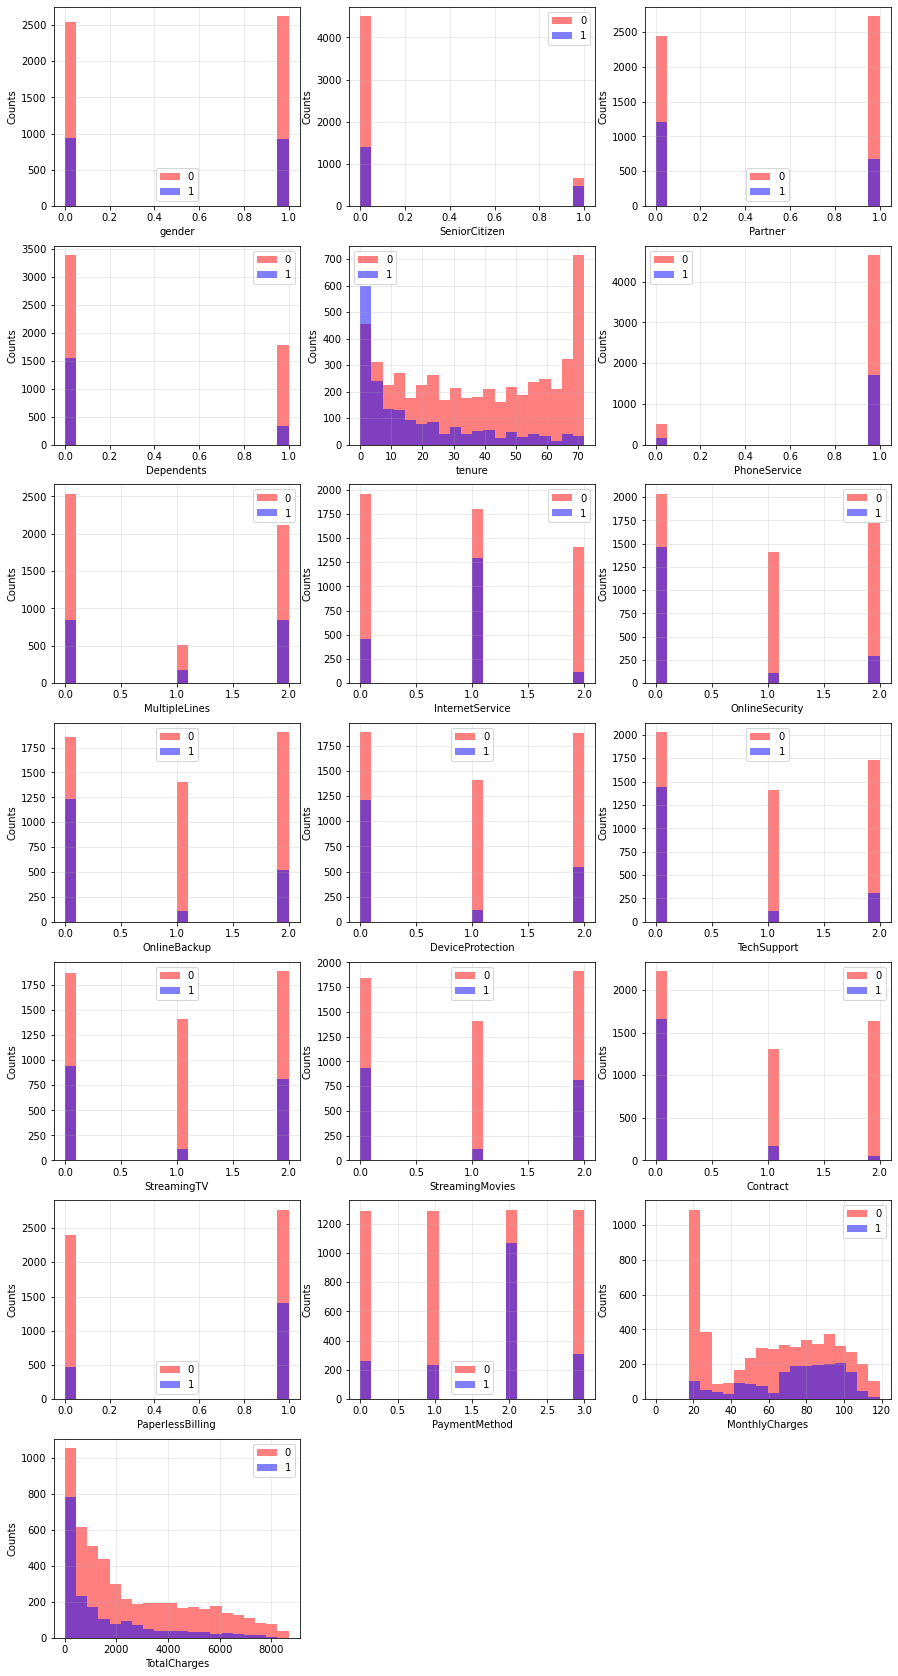

In [ ]:
import numpy as np

# Определим размер
plt.figure(figsize=(15, 30))

# Строим распределения
for i_col in range(len(X_columns)):

    # Создадим матрицу графиков
    plt.subplot(7, 3, i_col+1)

    # Получим значения столбцов
    x_col = df[X_columns[i_col]].values
    y_col = df[y_column].values

    # Визуализируем распределения
    bins = np.linspace(0, x_col.max(), 21)
    plt.grid(alpha = 0.3)
    plt.hist(x_col[y_col == 0], bins=bins, color='r', alpha=0.5, label='0')
    plt.hist(x_col[y_col == 1], bins=bins, color='b', alpha=0.5, label='1')

    # Определим названия осей и легенду
    plt.xlabel(X_columns[i_col])
    plt.ylabel('Counts')
    plt.legend(loc='best')

plt.show()

На всех графиках фиолетовый столбец это ушедшие клиенты, а красный - оставшиеся. Можно сделать следующие предварительные выводы:
<div>1. Клиенты которые дольше присутствовали склонны оставаться.
<div>2. Клиенты с большими общими платежами склонны оставаться.
<div>3. Склонность к оттоку зависит от следующих признаков: SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity,
       OnlineBackup, DeviceProtection, TechSupport, StreamingTV,
       StreamingMovies, Contract, PaperlessBilling, PaymentMethod.
    

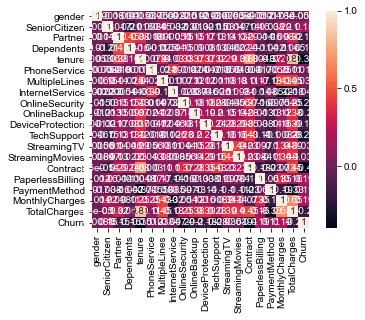

In [ ]:
#Построим матрицу корреляций и тепловую карту
cm = df.corr() #вычисляем матрицу корреляций

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
sns.set(font_scale=2,rc = {'figure.figsize':(40,40)})

plt.show()

Заметна корреляция между временем присутствия клиента и общими платжами. Но эта корреляция очевидна.  

## Построим модели прогнозирования оттока клиентов


### Построим модели градиентного бустинга на отложенной выборке

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score


In [ ]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# зададим список моделей
models = [
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(iterations=200, logging_level='Silent')
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(
        'Метрика roc_auc: {:.2f}'.format(roc_auc_score(y_test, predictions))
    )
# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

GradientBoostingClassifier()
Метрика roc_auc: 0.71
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[12:02:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

для всех моделей метрика Roc auc похожа. В лидерах пока  GradientBoosting и CatBoost.

### Построим модели с подстроенными параметрами (итерация 1)

1. Настройку max_depth мы везде поставим = 1 и трогать не будем, т.к. в ходе обучения было выяснено, что на "пеньках" лучше.

2. Зададим для всех моделей одинаковые параметры: число итераций - 200, max_features - 10, subsample - 0,7, learning_rate = 0,2

In [ ]:
# зададим список моделей с итерацией 1
models_1 = [
    GradientBoostingClassifier(max_depth=1, n_estimators=200,
                               max_features = 10, learning_rate=0.2,
                               subsample=0.7, random_state=2),
    XGBClassifier(max_depth=1, n_estimators=200, learning_rate=0.2,
                  subsample=0.7, random_state=2),
    LGBMClassifier(max_depth=1, n_estimators=200, max_features = 10,
                   learning_rate=0.2, subsample=0.7, random_state=2),
    CatBoostClassifier(max_depth=1, iterations=200, learning_rate=0.2,
                       random_state=2, subsample=0.7, logging_level='Silent')
]

# напишем цикл, который выводит метрику по списку моделей
for i in models_1:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)


GradientBoostingClassifier(learning_rate=0.2, max_depth=1, max_features=10,
                           n_estimators=200, random_state=2, subsample=0.7)
Метрика roc_auc: 0.73
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.7, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:02:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, th

Получили очень близкие значения метрики по всем моделям. Немного лидируют GradientBoosting и XGBC.

### Подстройка максимального количества признаков у GB и LGBM (итерация 2)

Зададим для всех моделей одинаковые параметры: число итераций - 200, max_features - 10 и 15, subsample - 0,7, learning_rate = 0,2

In [ ]:
# зададим список моделей с итерацией 2
models_2 = [
    GradientBoostingClassifier(max_depth=1, n_estimators=200,
                               max_features = 10, learning_rate=0.2,
                               subsample=0.7, random_state=2),
    XGBClassifier(max_depth=1, n_estimators=200, learning_rate=0.2,
                  subsample=0.7, random_state=2),
    LGBMClassifier(max_depth=1, n_estimators=200, max_features = 10,
                   learning_rate=0.2, subsample=0.7, random_state=2),
    CatBoostClassifier(max_depth=1, iterations=200, learning_rate=0.2,
                       random_state=2, subsample=0.7, logging_level='Silent')
]

# напишем цикл, который выводит метрику по списку моделей
for i in models_2:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)


GradientBoostingClassifier(learning_rate=0.2, max_depth=1, max_features=10,
                           n_estimators=200, random_state=2, subsample=0.7)
Метрика roc_auc: 0.73
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.7, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:02:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, th

Попробовал максимальное количество признаков менять на 10 и 15. Не влияет на результат. Решил удалить этот гиперпараметр.

### Подстройка количества деревьев/итераций (итерация 3)

Зададим для всех моделей одинаковые параметры: число итераций - 300, subsample - 0,7, learning_rate = 0,2

In [ ]:
# зададим список моделей с итерацией 3
models_3 = [
    GradientBoostingClassifier(max_depth=1, n_estimators=300,
                               learning_rate=0.2,
                               subsample=0.7, random_state=2),
    XGBClassifier(max_depth=1, n_estimators=300, learning_rate=0.2,
                  subsample=0.7, random_state=2),
    LGBMClassifier(max_depth=1, n_estimators=300, learning_rate=0.2,
                   subsample=0.7, random_state=2),
    CatBoostClassifier(max_depth=1, iterations=300, learning_rate=0.2,
                       random_state=2, subsample=0.7, logging_level='Silent')
]

# напишем цикл, который выводит метрику по списку моделей
for i in models_3:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=300,
                           random_state=2, subsample=0.7)
Метрика roc_auc: 0.73
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.7, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:02:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluat

XGBClassifier стал показывать хуже, по остальным не изменилось. Решил вернуть на 200 все.

### Подстройка learning rate (итерация 4)

Зададим для всех моделей одинаковые параметры: число итераций - 200, subsample - 0,7, learning_rate = 0,4

In [ ]:
# зададим список моделей с итерацией 4
models_4 = [
    GradientBoostingClassifier(max_depth=1, n_estimators=200,
                               learning_rate=0.4,
                               subsample=0.7, random_state=2),
    XGBClassifier(max_depth=1, n_estimators=200, learning_rate=0.4,
                  subsample=0.7, random_state=2),
    LGBMClassifier(max_depth=1, n_estimators=200, learning_rate=0.4,
                   subsample=0.7, random_state=2),
    CatBoostClassifier(max_depth=1, iterations=200, learning_rate=0.4,
                       random_state=2, subsample=0.7, logging_level='Silent')
]

# напишем цикл, который выводит метрику по списку моделей
for i in models_4:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=200,
                           random_state=2, subsample=0.7)
Метрика roc_auc: 0.73
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.7, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:02:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluat

XGBClassifier стала хуже, а LGBMClassifier лучше, остальные без изменений. XGBClassifier тогда lr ставим 0,2 по остальным оставляем 0,4 и меняем у всех subsample.

### Подстройка subsample (итерация 5)

Зададим для всех моделей одинаковые параметры: число итераций - 200, subsample - 0,5, learning_rate = 0,4 (0.2 XGBClassifier)

In [ ]:
# зададим список моделей с итерацией 5
models_5 = [
    GradientBoostingClassifier(max_depth=1, n_estimators=200,
                               learning_rate=0.4,
                               subsample=0.5, random_state=2),
    XGBClassifier(max_depth=1, n_estimators=200, learning_rate=0.2,
                  subsample=0.5, random_state=2),
    LGBMClassifier(max_depth=1, n_estimators=200, learning_rate=0.4,
                   subsample=0.5, random_state=2),
    CatBoostClassifier(max_depth=1, iterations=200, learning_rate=0.4,
                       random_state=2, subsample=0.5, logging_level='Silent')
]

# напишем цикл, который выводит метрику по списку моделей
for i in models_5:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=200,
                           random_state=2, subsample=0.5)
Метрика roc_auc: 0.72
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.5, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:02:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluat

С помощью subsample catboost улучшили остальные либо хуже либо никак. Оставляем такое значение subsample для catboost для остальных возвращаем как было.

In [ ]:
# зададим список моделей с итерацией 6
models_6 = [
    GradientBoostingClassifier(max_depth=1, n_estimators=200,
                               learning_rate=0.4,
                               subsample=0.7, random_state=2),
    XGBClassifier(max_depth=1, n_estimators=200, learning_rate=0.2,
                  subsample=0.7, random_state=2),
    LGBMClassifier(max_depth=1, n_estimators=200, learning_rate=0.4,
                   subsample=0.7, random_state=2),
    CatBoostClassifier(max_depth=1, iterations=200, learning_rate=0.4,
                       random_state=2, subsample=0.5, logging_level='Silent')
]

# напишем цикл, который выводит метрику по списку моделей
for i in models_6:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=200,
                           random_state=2, subsample=0.7)
Метрика roc_auc: 0.73
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.7, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:02:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluat

Получил на всех моделях метрику со значением 0,73.